In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
synth_data = pd.read_pickle("../microcolony_analysis_giant_lorentz/cell_data_giant_lorentz.pickle")

(0.0, 0.4)

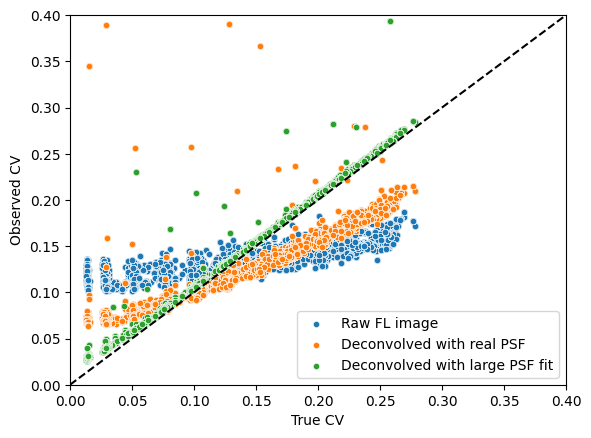

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(data=synth_data.query("`Colony N cells` > 200"), x="True CV", y="Observed CV", ax=ax,  s=20, label = "Raw FL image")  # Adjusted for size (s=20) and alpha
sns.scatterplot(data=synth_data.query("`Colony N cells` > 200"), x="True CV", y="Deconvolved CV real PSF", ax=ax,  s=20, label = "Deconvolved with real PSF")
sns.scatterplot(data=synth_data.query("`Colony N cells` > 200"), x="True CV", y="Deconvolved CV large PSF", ax=ax,  s=20, label = "Deconvolved with large PSF fit")

plt.plot([0,0.7], [0,0.7], c = "k", linestyle="--")
plt.legend()
plt.xlim(0,0.4)
plt.ylim(0,0.4)

In [35]:
real_colony_data = pd.read_pickle("../microcolony_analysis/real_data_segmentation_notebooks/agar_pad_with_deconv_lorentz_and_real_psf.pickle")

In [82]:
types_of_int = ["Observed intensity", "Deconvolved intensity real PSF", "Deconvolved intensity large PSF"]

In [86]:
real_colony_data[types_of_int]

,Observed intensity,Deconvolved intensity real PSF,Deconvolved intensity large PSF
0,2617486.0,3.423913e+06,4.983790e+06
1,3387091.0,4.428457e+06,6.866872e+06
2,2601728.0,3.436959e+06,4.973773e+06
3,3197346.0,4.211821e+06,6.556307e+06
0,4752731.0,5.863823e+06,7.425875e+06
...,...,...,...
3,2181618.0,2.885515e+06,4.285652e+06
0,2675198.0,3.699858e+06,5.473256e+06
1,2370179.0,3.207659e+06,4.922344e+06
0,2255056.0,3.130434e+06,4.775895e+06


'Mean Deconvolved intensity large PSF'

In [90]:
for type_of_int in types_of_int:
    real_colony_data["Mean " + type_of_int] = real_colony_data[type_of_int] / real_colony_data["Area"]

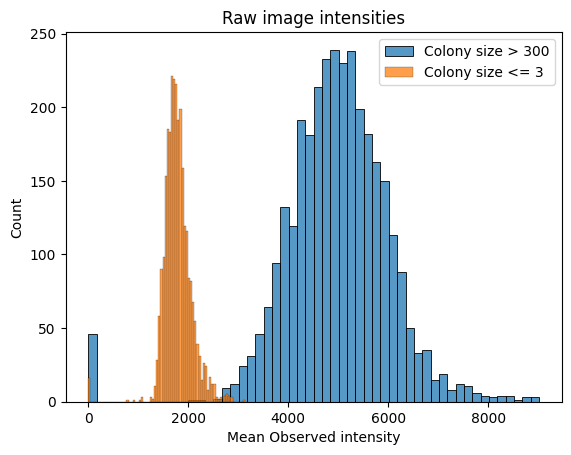

In [91]:
plt.title("Raw image intensities")
sns.histplot(data = real_colony_data.query("`Colony N cells` > 300"), x = "Mean Observed intensity", label = "Colony size > 300")
sns.histplot(data = real_colony_data.query("`Colony N cells` <= 3"), x = "Mean Observed intensity", label = "Colony size <= 3")
plt.legend()

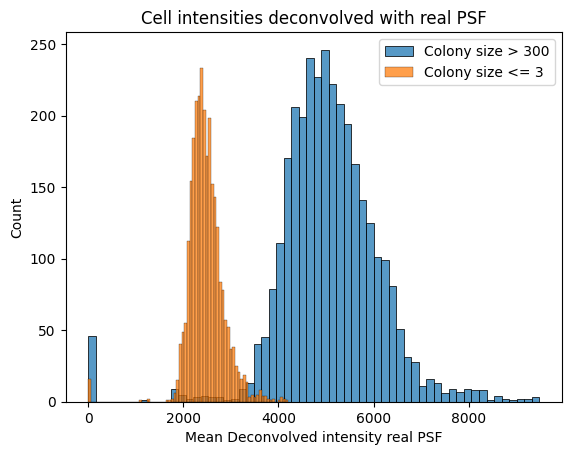

In [93]:
plt.title("Cell intensities deconvolved with real PSF")
sns.histplot(data = real_colony_data.query("`Colony N cells` > 300"), x = "Mean Deconvolved intensity real PSF", label = "Colony size > 300")
sns.histplot(data = real_colony_data.query("`Colony N cells` <= 3"), x = "Mean Deconvolved intensity real PSF", label = "Colony size <= 3")
plt.legend()

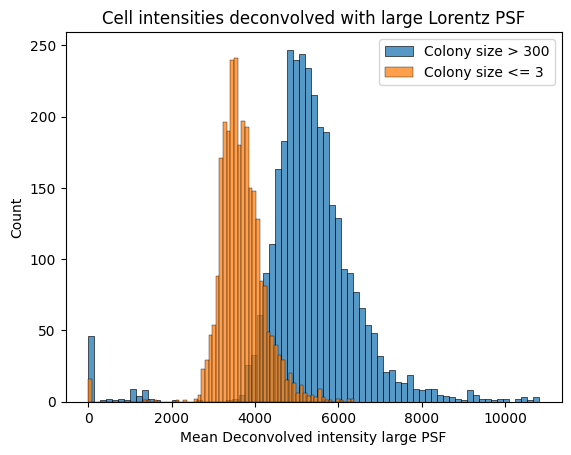

In [94]:
plt.title("Cell intensities deconvolved with large Lorentz PSF")
sns.histplot(data = real_colony_data.query("`Colony N cells` > 300"), x = "Mean Deconvolved intensity large PSF", label = "Colony size > 300")
sns.histplot(data = real_colony_data.query("`Colony N cells` <= 3"), x = "Mean Deconvolved intensity large PSF", label = "Colony size <= 3")
plt.legend()

In [95]:
types_of_int_cv_check = ["Mean Observed intensity", "Mean Deconvolved intensity real PSF", "Mean Deconvolved intensity large PSF"]

In [96]:
for type_of_int in types_of_int_cv_check:
    print(type_of_int+" CV of colonies > 300 cells", real_colony_data.query("`Colony N cells` > 300")[type_of_int].std()/real_colony_data.query("`Colony N cells` > 300")[type_of_int].mean())
    print(type_of_int+" CV of colonies == 1 cell", real_colony_data.query("`Colony N cells` == 1")[type_of_int].std()/real_colony_data.query("`Colony N cells` == 1")[type_of_int].mean())

Mean Observed intensity CV of colonies > 300 cells 0.22018631724943036
Mean Observed intensity CV of colonies == 1 cell 0.42106930581033847
Mean Deconvolved intensity real PSF CV of colonies > 300 cells 0.22111147949680285
Mean Deconvolved intensity real PSF CV of colonies == 1 cell 0.42159596034405755
Mean Deconvolved intensity large PSF CV of colonies > 300 cells 0.22893722400442182
Mean Deconvolved intensity large PSF CV of colonies == 1 cell 0.4284918482263543


In [97]:
for type_of_int in types_of_int_cv_check:
    print(type_of_int+" Mean of colonies > 300 cells", real_colony_data.query("`Colony N cells` > 300")[type_of_int].mean())
    print(type_of_int+" Mean of colonies == 1 cell", real_colony_data.query("`Colony N cells` == 1")[type_of_int].mean())

Mean Observed intensity Mean of colonies > 300 cells 4959.591009430099
Mean Observed intensity Mean of colonies == 1 cell 1462.4385781894423
Mean Deconvolved intensity real PSF Mean of colonies > 300 cells 5046.841038058501
Mean Deconvolved intensity real PSF Mean of colonies == 1 cell 2123.9659934297993
Mean Deconvolved intensity large PSF Mean of colonies > 300 cells 5330.658338248178
Mean Deconvolved intensity large PSF Mean of colonies == 1 cell 3151.867386718559


In [78]:
real_colony_data

,Label,True intensity,Observed intensity,Deconvolved intensity large PSF,Deconvolved intensity real PSF,Colony circularity,Cell y,Cell x,Colony diameter,Colony centroid y,Colony centroid x,N neighbours,Colony N cells,Area
0,31,2617486.0,2617486.0,4.983790e+06,3.423913e+06,1.466081,78.141431,838.917637,125.801431,100.666731,818.377565,2,4,1202.0
1,33,3387091.0,3387091.0,6.866872e+06,4.428457e+06,1.466081,100.546070,847.968157,125.801431,100.666731,818.377565,3,4,1476.0
2,34,2601728.0,2601728.0,4.973773e+06,3.436959e+06,1.466081,97.972270,791.395147,125.801431,100.666731,818.377565,3,4,1154.0
3,36,3197346.0,3197346.0,6.556307e+06,4.211821e+06,1.466081,122.621114,791.459870,125.801431,100.666731,818.377565,2,4,1383.0
0,37,4752731.0,4752731.0,7.425875e+06,5.863823e+06,1.268023,348.116413,248.039853,268.078347,435.804677,206.343626,4,25,1907.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,125,2181618.0,2181618.0,4.285652e+06,2.885515e+06,1.794684,2045.198817,90.092387,164.915130,2021.828631,138.080135,2,4,1353.0
0,121,2675198.0,2675198.0,5.473256e+06,3.699858e+06,1.481906,2008.804242,1357.450303,108.046286,2016.638712,1375.223533,1,2,1650.0
1,124,2370179.0,2370179.0,4.922344e+06,3.207659e+06,1.481906,2025.337820,1394.958277,108.046286,2016.638712,1375.223533,1,2,1486.0
0,126,2255056.0,2255056.0,4.775895e+06,3.130434e+06,1.615190,2210.194672,1227.920765,110.113578,2222.468695,1208.242306,1,2,1464.0


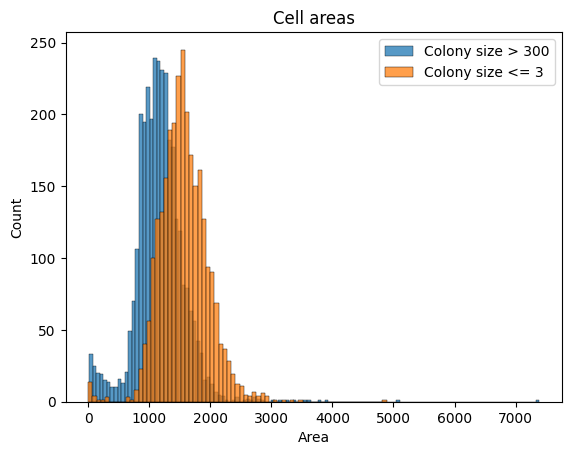

In [99]:
plt.title("Cell areas")
sns.histplot(data = real_colony_data.query("`Colony N cells` > 300"), x = "Area", label = "Colony size > 300")
sns.histplot(data = real_colony_data.query("`Colony N cells` <= 3"), x = "Area", label = "Colony size <= 3")
plt.legend()